In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = engine.execute('SELECT max(date) FROM measurement').fetchall()
print(recent_date)

[('2017-08-23',)]


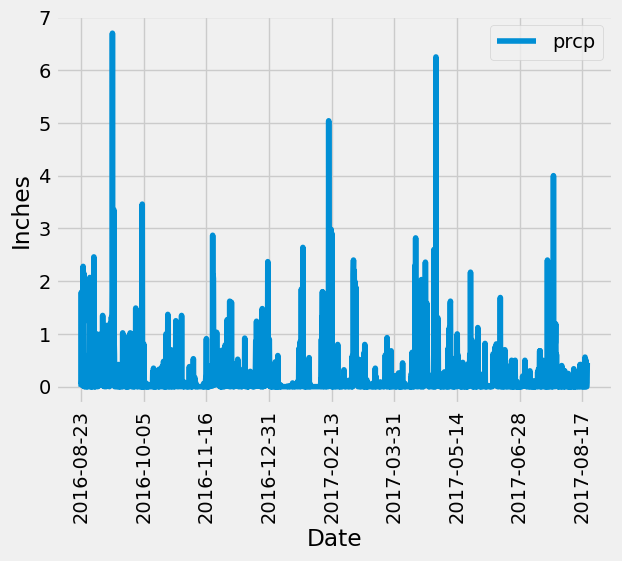

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
rain_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2016-08-23").\
    filter(measurement.date <= "2017-08-23").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain_data)
rain__df =rain_df.rename(columns={0:'date', 1:'precipitation'})
rain_df = rain_df.set_index('date')

# Sort the dataframe by date
rain_df = rain_df.sort_values(by='date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.savefig(r"/Users/thehazeplace/Desktop/uci/SQLAlchemy-Challenge/SQLAlchemy-Challenge/SurfsUp/Precipitation Analysis.png")
plt.show()



In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.id).count() 
print(f'There are {station_count} stations in the dateset.')

There are 9 stations in the dateset.


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
print(active_stations)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = active_stations[0][0]
print('Lowest temp:')
print(session.query(func.min(measurement.tobs)).filter(measurement.station == most_active).all()[0][0])
print('Highest temp:')
print(session.query(func.max(measurement.tobs)).filter(measurement.station == most_active).all()[0][0])
print('Average temp:')
print(session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active).all()[0][0])

Lowest temp:
54.0
Highest temp:
85.0
Average temp:
71.66378066378067


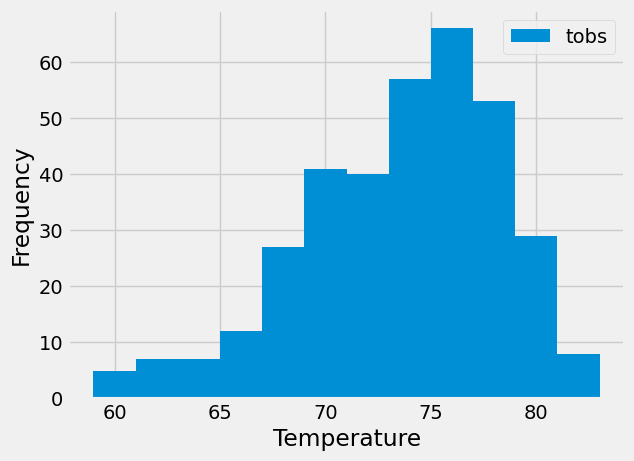

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.date, measurement.tobs).\
                        filter(measurement.date >= "2016-08-23").\
                        filter(measurement.date <= "2017-08-23").\
                        filter(measurement.station == most_active).all()


results_df = pd.DataFrame(results)
results_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.legend(['tobs'])
plt.savefig(r"/Users/thehazeplace/Desktop/uci/SQLAlchemy-Challenge/SQLAlchemy-Challenge/SurfsUp/Station Analysis.png")
plt.show()

# Close session

In [20]:
# Close Session
session.close()